## Introduçao a Visão Computacional

Verificando versão instalada do OpenCV

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
print(cv2.__version__)

#Pop-up do Matplotlib
#%matplotlib qt

#Exibição na mesma tela do Jupyter
%matplotlib inline

#plt.style.use("seaborn")
#sns.set_style("whitegrid", {"axes.grid" : False})

3.4.2


/Users/michel.fernandes/anaconda/lib/python3.6/site-packages/joblib/_multiprocessing_helpers.py:28: UserWarning: [Errno 28] No space left on device.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


Carregando uma imagem previamente existente

In [4]:
imagem = cv2.imread("imagens/russian.jpg", cv2.IMREAD_COLOR)

#Conversão necessária para que o Matplotlib consiga abrir as imagens.
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

print("comprimento (w): %d pixels" % (imagem.shape[1]))
print("altura (h): %d pixels" % (imagem.shape[0]))
print("canais: %d" % (imagem.shape[2]))

comprimento (w): 1536 pixels
altura (h): 1024 pixels
canais: 3


Exibindo a imagem uma janela separada

_No MacOS essa operação trava o Jupyter :(, prefira o método com o Pyplot, pois ele será utilizando durante o curso._

In [9]:
cv2.imshow("Russia", imagem)
cv2.waitKey()
cv2.destroyAllWindows()

Forma alterantiva de exibir uma imagem, utilizando o _Matplotlib_.

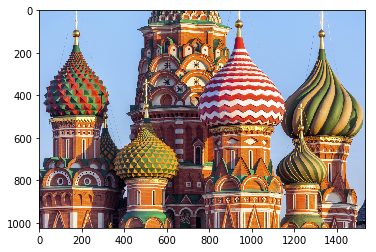

In [5]:
plt.imshow(imagem)

Escrevendo o objeto image em outro arquivo

In [6]:
cv2.imwrite("russian_2.jpg", imagem)

True

A representação da imagem aberta é (1536, 1028, 3), sendo o último parâmetro o número de canais, um para cada cor do RGB.

In [7]:
(b, g, r) = imagem[0, 0]
print("Pixel at (0, 0) - Red: %d, Green: %d, Blue: %d" % (r, g, b))

Pixel at (0, 0) - Red: 244, Green: 194, Blue: 152


In [9]:
imagem[0:10, 0:10] = (0, 0, 255)
(b, g, r) = imagem[0, 0]
print("Pixel at (0, 0) - Red: %d, Green: %d, Blue: %d" % (r, g, b))

Pixel at (0, 0) - Red: 255, Green: 0, Blue: 0


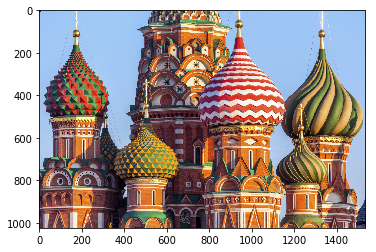

In [10]:
plt.imshow(imagem)

Conversão de uma imagem em escala de cinza

In [11]:
imagem_gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

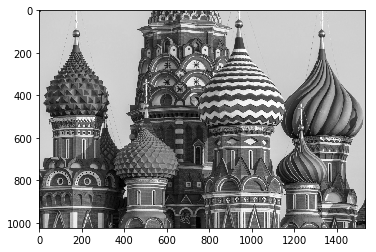

In [12]:
plt.imshow(imagem_gray, cmap = "gray")

In [13]:
g = imagem_gray[0, 0]
print("Pixel at (0, 0) - Grayscale: %d" % (g))

Pixel at (0, 0) - Grayscale: 76


In [14]:
imagem_gray.shape

(1024, 1536)

In [15]:
imagem.shape

(1024, 1536, 3)

Manipulando imagem no espaço HSV

In [16]:
imagem_hsv = cv2.cvtColor(imagem, cv2.COLOR_BGR2HSV)

Text(0.5,1,'Russia HSV')

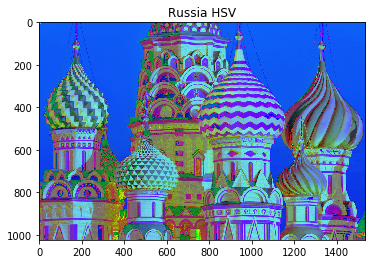

In [17]:
plt.imshow(imagem_hsv)
plt.title("Rússia HSV")

Text(0.5,1,'Russia Hue (Matiz)')

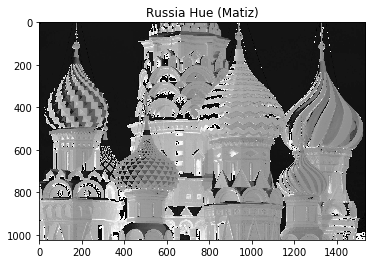

In [18]:
plt.imshow(imagem_hsv[:,:,0], cmap="gray")
plt.title("Russia Hue (Matiz)")

Text(0.5,1,'Russia Saturation (Saturação)')

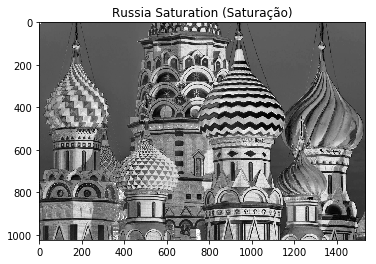

In [19]:
plt.imshow(imagem_hsv[:,:,1], cmap="gray")
plt.title("Russia Saturation (Saturação)")

Text(0.5,1,'Russia Value (Brilho)')

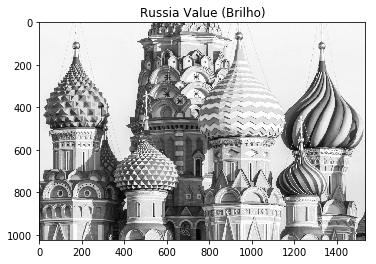

In [20]:
plt.imshow(imagem_hsv[:,:,2], cmap="gray")
plt.title("Russia Value (Brilho)")

Manipulando imagem no espaço RGB

*A função split separa de uma imagem RGB (ou BGR) suas componetnes R, G e B.*

In [21]:
b, g, r = cv2.split(imagem)

Text(0.5,1,'Russia RGB')

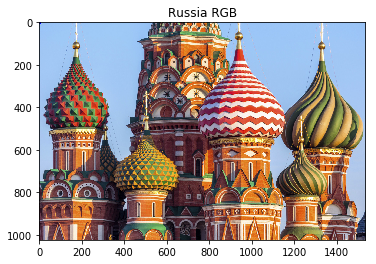

In [22]:
plt.imshow(imagem)
plt.title("Russia RGB")

Text(0.5,1,'Russia Blue')

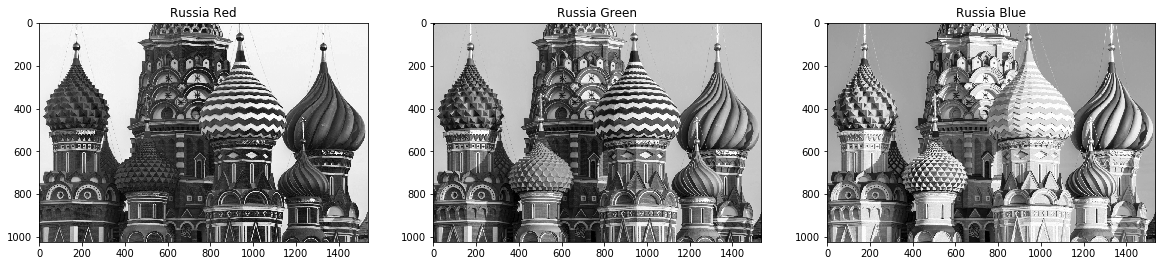

In [23]:
plt.figure(figsize=(20,20))

#Composição Vermelha
plt.subplot(1,3,1)
plt.imshow(r, cmap = "gray")
plt.title("Russia Red")

#Composição Verde
plt.subplot(1,3,2)
plt.imshow(g, cmap = "gray")
plt.title("Russia Green")

#Composição Azul
plt.subplot(1,3,3)
plt.imshow(b, cmap = "gray")
plt.title("Russia Blue")

Utilizando a função merge para combinar as componentes de cores e trazer sua visualização original.

*Referência documentação do [OpenCV](https://docs.opencv.org/3.1.0/d3/df2/tutorial_py_basic_ops.html).*

In [25]:
import numpy as np

r, g, b = cv2.split(imagem)
imagem_vazia = np.zeros(imagem.shape[:2], dtype=np.uint8)

Text(0.5,1,'Russia Blue')

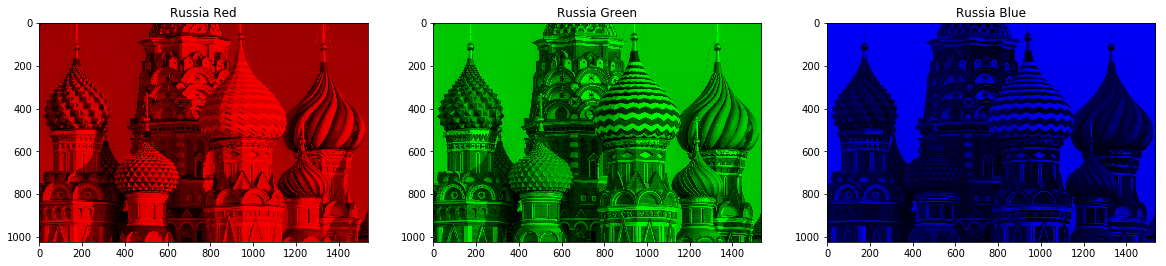

In [26]:
plt.figure(figsize=(20,20))

plt.subplot(1,3,1)
plt.imshow(cv2.merge([r, imagem_vazia, imagem_vazia]))
plt.title("Russia Red")

plt.subplot(1,3,2)
plt.imshow(cv2.merge([imagem_vazia, g, imagem_vazia]))
plt.title("Russia Green")

plt.subplot(1,3,3)
plt.imshow(cv2.merge([imagem_vazia, imagem_vazia, b]))
plt.title("Russia Blue")

Text(0.5,1,'Russia RGB')

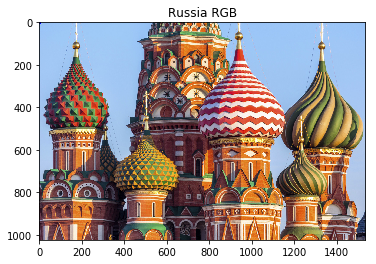

In [27]:
plt.imshow(cv2.merge([r, g, b]))
plt.title("Russia RGB")

In [28]:
r, g, b = cv2.split(imagem)

Uma vez que é possível separar cada componente de imagem, também podemos interagir com estes valores para aumentar a intensidade de cada componente.
Note que isso pode resultar em saturações, que é quando um determinado pixel atinge seu valor máximo.

Text(0.5,1,'Intensificado Vermelho')

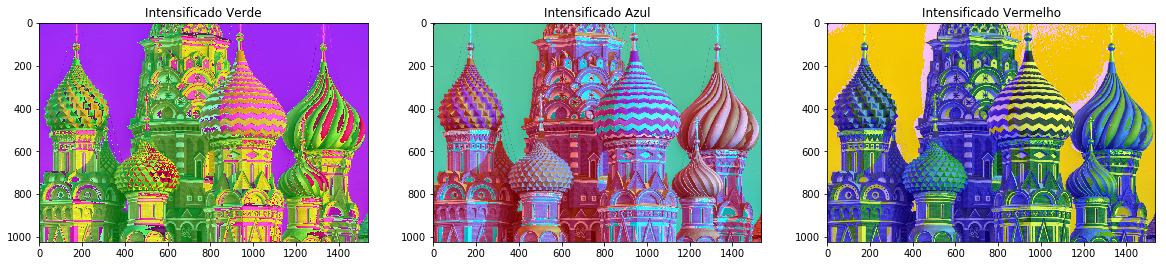

In [30]:
plt.figure(figsize=(20,20))

#Intensificando o componente verde da imagem
plt.subplot(1,3,1)
plt.imshow(cv2.merge([r, g+100, b]))
plt.title("Intensificado Verde")

#Intensificando o componente azul da imagem
plt.subplot(1,3,2)
plt.imshow(cv2.merge([b+100, g, r]))
plt.title("Intensificado Azul")

#Intensificando o componente vermelho da imagem
plt.subplot(1,3,3)
plt.imshow( cv2.merge([b, g, r+100]))
plt.title("Intensificado Vermelho")

## Histogramas

In [31]:
imagem_blue_man = cv2.imread("imagens/blue-man-group.jpg", cv2.IMREAD_COLOR)
imagem_blue_man = cv2.cvtColor(imagem_blue_man, cv2.COLOR_BGR2RGB)

Text(0.5,1,'Blue Man Group')

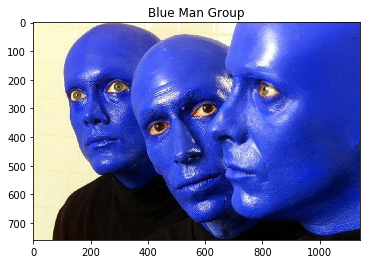

In [32]:
plt.imshow(imagem_blue_man)
plt.title("Blue Man Group")

Definindo um dicionário dos componentes de cores para ser utilizado nas funções de histograma.

In [33]:
cores = {"b": 0, "g": 1, "r": 2}

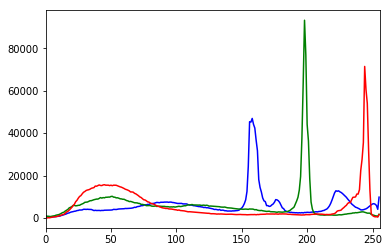

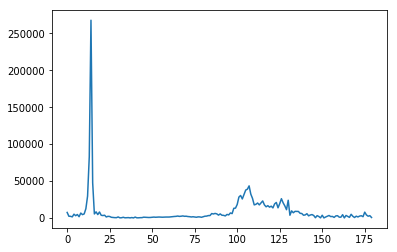

In [35]:
def histograma_bgr(imagem):
    for cor in cores:
        histograma = cv2.calcHist([imagem],[cores[cor]],None,[256],[0,256])
        plt.plot(histograma,color = cor)
        plt.xlim([0,256])
    plt.show()

def histograma_hue(imagem_hsv):
    imagem_hsv = cv2.cvtColor(imagem_hsv, cv2.COLOR_BGR2HSV)
    histograma_hue = cv2.calcHist([imagem_hsv], [0], None, [180], [0, 180])
    plt.plot(histograma_hue)
    plt.show() 

histograma_bgr(imagem)
histograma_hue(imagem)

Reparem que em imagens mais escuras, o histograma correspondente vai indicar menor concentração nos valores maiores, ficando sempre próximo de zero.

Text(0.5,1,'Seven')

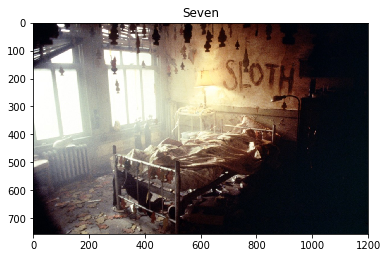

In [38]:
imagem_seven = cv2.imread("imagens/seven.jpg", cv2.IMREAD_COLOR)
imagem_seven = cv2.cvtColor(imagem_seven, cv2.COLOR_BGR2RGB)

plt.imshow(imagem_seven)
plt.title("Seven")

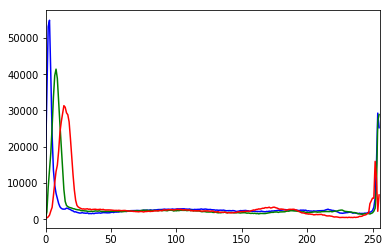

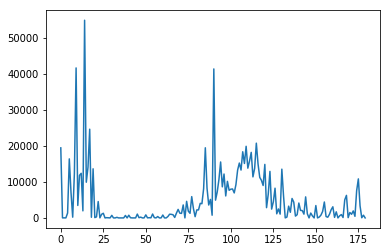

In [39]:
histograma_bgr(imagem_seven)
histograma_hue(imagem_seven)

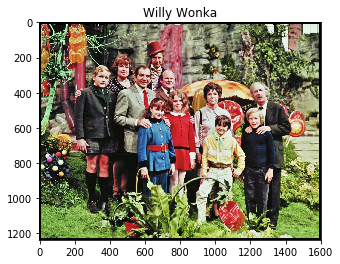

In [69]:
imagem_willy_wonka = cv2.imread("imagens/willy-wonka.jpg", cv2.IMREAD_COLOR)
imagem_willy_wonka = cv2.cvtColor(imagem_willy_wonka, cv2.COLOR_BGR2RGB)

plt.imshow(imagem_willy_wonka)
plt.title("Willy Wonka")
plt.show()

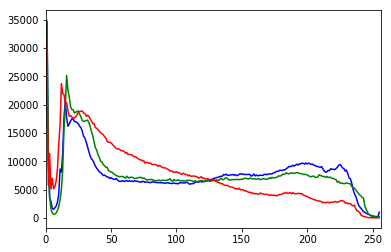

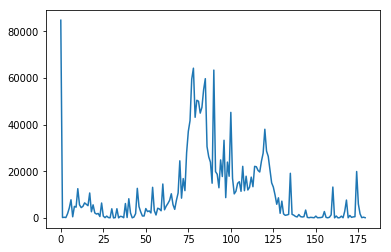

In [44]:
histograma_bgr(imagem_willy_wonka)
histograma_hue(imagem_willy_wonka)

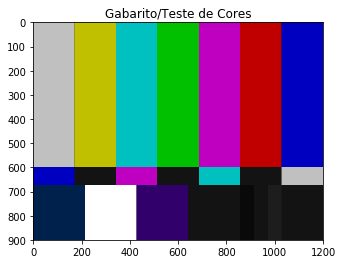

In [68]:
imagem_teste_cores = cv2.imread("imagens/tv-image-test.png", cv2.IMREAD_COLOR)
imagem_teste_cores = cv2.cvtColor(imagem_teste_cores, cv2.COLOR_BGR2RGB)

plt.imshow(imagem_teste_cores)
plt.title("Gabarito/Teste de Cores")
plt.show()

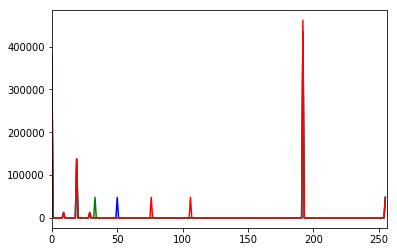

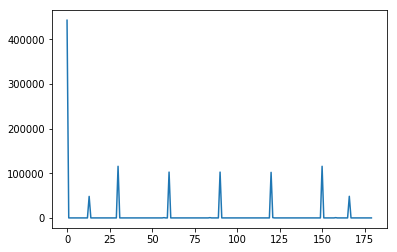

In [47]:
histograma_bgr(imagem_teste_cores)
histograma_hue(imagem_teste_cores)

Este é um ensaio de acompanhamento de histograma sendo realizado ao mesmo tempo que um vídeo é executado. É possível notar alterações bem marcantes em trasições de telas e cenas, que posteriormente podem ser estudados para segmentação e edição de trechos.

*Adaptado deste [repositório](https://github.com/nrsyed/computer-vision/tree/master/real_time_histogram), de Najam Syed.*

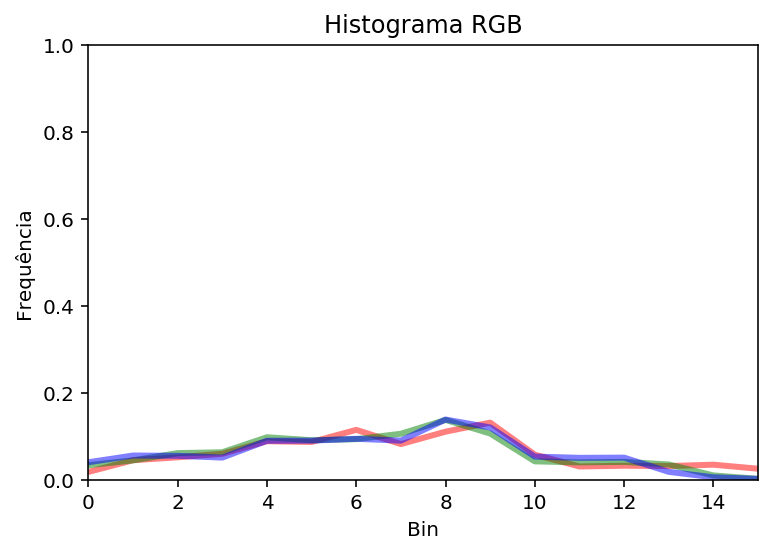

In [48]:
%matplotlib qt

bins = 16

video = cv2.VideoCapture("videos/trapalhões.mpg")

# Configuração do gráfico
fig, ax = plt.subplots()
ax.set_title("Histograma RGB")
ax.set_xlabel("Bin")
ax.set_ylabel("Frequência")

# Configurando cada origem de linha do gráfico para representação das cores RGB
lw = 3
alpha = 0.5

lineR, = ax.plot(np.arange(bins), np.zeros((bins,)), c="r", lw=lw, alpha=alpha)
lineG, = ax.plot(np.arange(bins), np.zeros((bins,)), c="g", lw=lw, alpha=alpha)
lineB, = ax.plot(np.arange(bins), np.zeros((bins,)), c="b", lw=lw, alpha=alpha)

ax.set_xlim(0, bins-1)
ax.set_ylim(0, 1)

plt.ion()
plt.show()

# A variável ret indica se o frame do vídeo foi extraído com sucesso, retornando True, do contrário False
# A outra varíavel frame é a imagem do frame do vídeo, lembrando que um vídeo é composto por vários frames
# ou imagens :)

while True:
    ret, frame = video.read()

    if not ret:
        break

    # Extraindo histograma dos componentes de cores
    numPixels = np.prod(frame.shape[:2])
    cv2.imshow("RGB", frame)
    (b, g, r) = cv2.split(frame)
    histogramR = cv2.calcHist([r], [0], None, [bins], [0, 255]) / numPixels
    histogramG = cv2.calcHist([g], [0], None, [bins], [0, 255]) / numPixels
    histogramB = cv2.calcHist([b], [0], None, [bins], [0, 255]) / numPixels
    lineR.set_ydata(histogramR)
    lineG.set_ydata(histogramG)
    lineB.set_ydata(histogramB)
    fig.canvas.draw()
    
    #Para sair pressione a tecla q
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break
        
    #Para pausar pressione a tecla p
    if 0xFF == ord("p"):
        capture.pause()
   

video.release()
cv2.destroyAllWindows()

In [41]:
capture.release()
cv2.destroyAllWindows()

## Construção de imagens

Desenhando um painel em branco. Uma imagem em branco é considerada ausente de pixels, logo seu aspecto gráfico é preto.

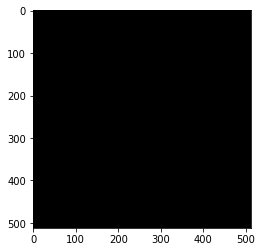

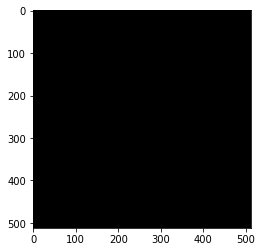

In [49]:
%matplotlib inline

imagem_color = np.zeros((512, 512, 3), np.uint8)
imagem_gray = np.zeros((512, 512), np.uint8)

plt.imshow(imagem_color)
plt.show()

plt.imshow(imagem_gray, cmap="gray")
plt.show()

Desenhando uma linha.

_A função **line** recebe como parâmetros de entrada a imagem, as coordenadas (x,y) de início, fim, cor em RGB e espessura da linha._

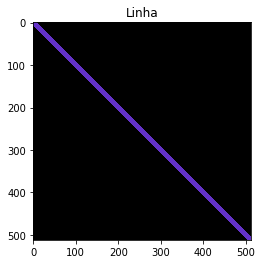

In [50]:
imagem_color = np.zeros((512, 512, 3), np.uint8)
cv2.line(imagem_color,(0,0), (511,511), (100, 50, 200), 10)

plt.imshow(imagem_color)
plt.title("Linha")
plt.show()

Desenhando um quadrado ou retângulo. 

_A funçao **rectangle** recebe como parâmetros de entrada a imagem, as coordenadas do vértice de início, do vértice oposto, cor em RGB e espessura da linha._

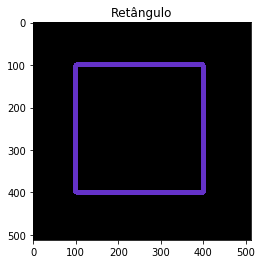

In [53]:
imagem_color = np.zeros((512, 512, 3), np.uint8)
cv2.rectangle(imagem_color,(100,100), (400,400), (100, 50, 200), 10)

plt.imshow(imagem_color)
plt.title("Retângulo")
plt.show()

Desenhando um quadrado ou retângulo com cores invertidas.

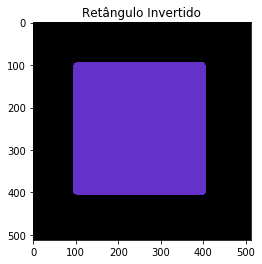

In [54]:
image_color = np.zeros((512, 512, 3), np.uint8)
cv2.rectangle(imagem_color,(100,100), (400,400), (100, 50, 200), -1)

plt.imshow(imagem_color)
plt.title("Retângulo Invertido")
plt.show()

Desenhando círculos. 

_A função **circle** recebe como parâmetros de entrada a imagem, origem do círculo, raio, cor em RGB e espessura da linha._

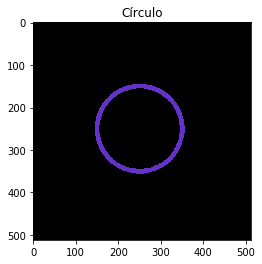

In [55]:
imagem_color = np.zeros((512, 512, 3), np.uint8)
cv2.circle(imagem_color,(250,250), 100, (100, 50, 200), 10)

plt.imshow(imagem_color)
plt.title("Círculo")
plt.show()

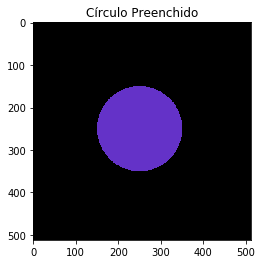

In [59]:
imagem_color = np.zeros((512, 512, 3), np.uint8)
cv2.circle(imagem_color,(250,250), 100, (100, 50, 200), -1)

plt.imshow(imagem_color)
plt.title("Círculo Preenchido")
plt.show()

Desenhando polígonos. 

_A função **polylines** recebe como parâmetros de entrada a imagem, as coordenadas (x,y) de cada vértice do polígono, valor booleano par polígono aberto ou fechado, cor em RGB e espessura da linha._

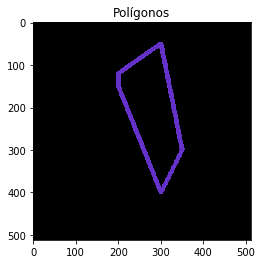

In [60]:
imagem_color = np.zeros((512, 512, 3), np.uint8)

pts = np.array( [[200,120], [300,50], [350,300], [300,400], [200,150]], np.int32)

cv2.polylines(imagem_color, [pts], True, (100, 50, 200), 10)

plt.imshow(imagem_color)
plt.title("Polígonos")
plt.show()

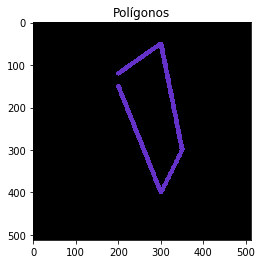

In [61]:
imagem_color = np.zeros((512, 512, 3), np.uint8)

pts = np.array( [[200,120], [300,50], [350,300], [300,400], [200,150]], np.int32)

cv2.polylines(imagem_color, [pts], False, (100, 50, 200), 10)


plt.imshow(imagem_color)
plt.title("Polígonos")
plt.show()

_A função **fillPolly** recebe como parâmetros de entrada a imagem, as coordenadas (x,y) de cada vértice do polígono e cor em RGB._

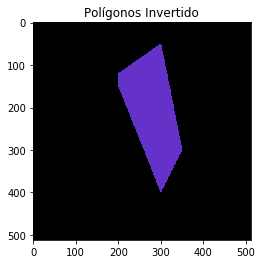

In [62]:
imagem_color = np.zeros((512, 512, 3), np.uint8)

pts = np.array( [[200,120], [300,50], [350,300], [300,400], [200,150]], np.int32)

cv2.fillPoly(imagem_color, [pts], (100, 50, 200))

plt.imshow(imagem_color)
plt.title("Polígonos Invertido")
plt.show()

Inserindo textos em uma imagem. As fontes disponíveis não suporta caracteres especiais (UTF-8) como acentos. Se isto for um problema deve-se olhar para outras bibliotecas que podem fazer este trabalho um pouco melhor como o PIL.

_A função **putText** recebe como parâmetro de entrada a imagem, o texto, as coordenadas (x,y), a fonte, o tamanho da fonte, a cor em RGB e a espessura da linha_

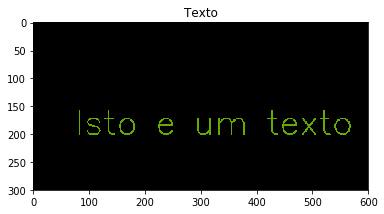

In [67]:
imagem_color = np.zeros((300, 600, 3), np.uint8)
cv2.putText(imagem_color, "Isto e um texto :)", (75,200), cv2.FONT_HERSHEY_SIMPLEX, 2, (100,170,0), 2)

plt.imshow(imagem_color)
plt.title("Texto")
plt.show()